# Covid-19 Trend Analysis

<h5>The purpose of this notebook to find the trends and changes in the Covid cases. We can find the following insights from the data -</h5>

1. Changes in number of affected cases over time
2. Change in cases over time at country level
3. Latest number of affected cases
   

<h3>Context:</h3>

* A new coronavirus designated 2019-nCoV was first identified in Wuhan, the capital of China's Hubei province
* People developed pneumonia without a clear cause and for which existing vaccines or treatments were not effective.
* The virus has shown evidence of human-to-human transmission
* Transmission rate (rate of infection) appeared to escalate in mid-January 2020
* As of 30 January 2020, approximately 8,243 cases have been confirmed

<h3>Acknowledgements / Data Source</h3>

* FreeCodeCamp for the Course on python and project - https://www.freecodecamp.org/news/python-data-science-course-matplotlib-pandas-numpy/
* https://github.com/CSSEGISandData/COVID-19
* https://www.worldometers.info/
* https://www.kaggle.com/imdevskp/corona-virus-report

<h4>We need to import python Data structure and data visualization libraries to help with the depiction.</h4>

In [8]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

<h4>I got the dataset from Kaggle website to help with the analysis.</h4>

In [13]:
df = pd.read_csv('covid_19_data.csv')

In [14]:
df.head(50)

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,1/22/2020,Anhui,Mainland China,1/22/2020 17:00,1,0,0
1,2,1/22/2020,Beijing,Mainland China,1/22/2020 17:00,14,0,0
2,3,1/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6,0,0
3,4,1/22/2020,Fujian,Mainland China,1/22/2020 17:00,1,0,0
4,5,1/22/2020,Gansu,Mainland China,1/22/2020 17:00,0,0,0
5,6,1/22/2020,Guangdong,Mainland China,1/22/2020 17:00,26,0,0
6,7,1/22/2020,Guangxi,Mainland China,1/22/2020 17:00,2,0,0
7,8,1/22/2020,Guizhou,Mainland China,1/22/2020 17:00,1,0,0
8,9,1/22/2020,Hainan,Mainland China,1/22/2020 17:00,4,0,0
9,10,1/22/2020,Hebei,Mainland China,1/22/2020 17:00,1,0,0


In [15]:
df.drop(['SNo','Last Update'],axis=1,inplace=True)
df.rename(columns={'ObservationDate':'Date','Province/State':'State','Country/Region':'Country'},inplace=True)

In [16]:
df['Date'] = pd.to_datetime(df['Date'])

In [17]:
imputer = SimpleImputer(strategy='constant')
df2 = pd.DataFrame(imputer.fit_transform(df),columns=df.columns)

In [18]:
df3 = df2.groupby(['Country','Date'])[['Country','Date','Confirmed','Deaths','Recovered']].sum().reset_index()

In [19]:
df3.head(20)

,Country,Date,Confirmed,Deaths,Recovered
0,Azerbaijan,2020-02-28,1,0,0
1,"('St. Martin',)",2020-03-10,2,0,0
2,Afghanistan,2020-02-24,1,0,0
3,Afghanistan,2020-02-25,1,0,0
4,Afghanistan,2020-02-26,1,0,0
5,Afghanistan,2020-02-27,1,0,0
6,Afghanistan,2020-02-28,1,0,0
7,Afghanistan,2020-02-29,1,0,0
8,Afghanistan,2020-03-01,1,0,0
9,Afghanistan,2020-03-02,1,0,0


In [20]:
countries = df3['Country'].unique()
len(countries)

223

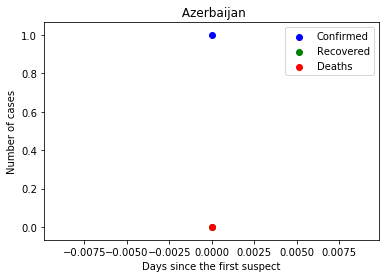

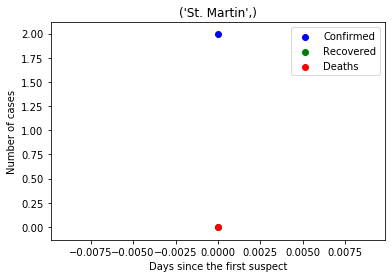

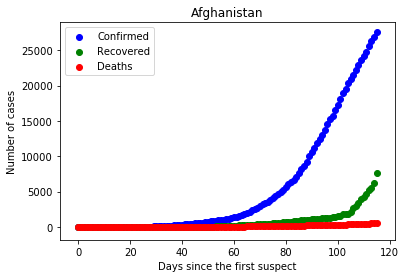

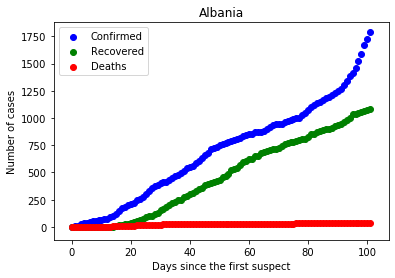

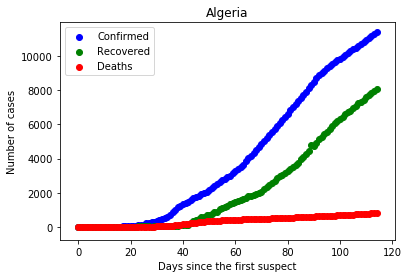

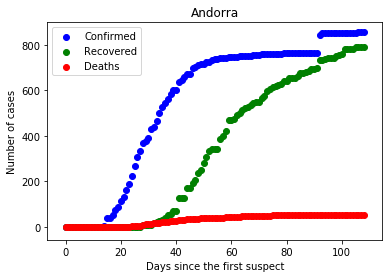

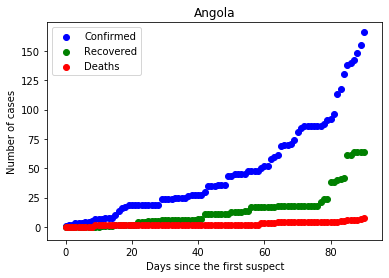

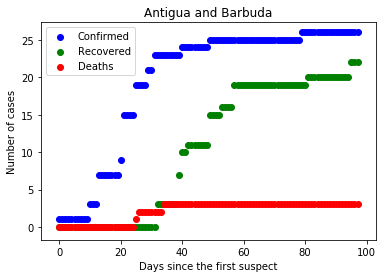

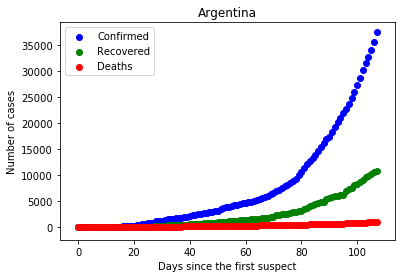

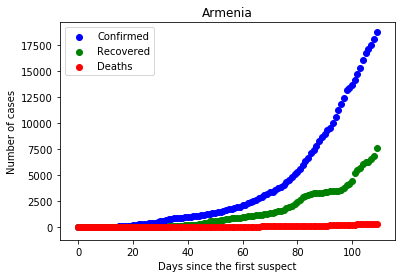

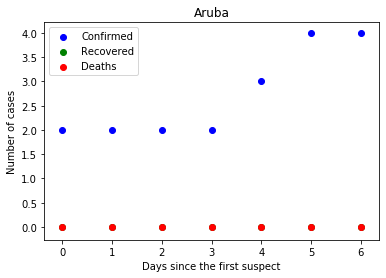

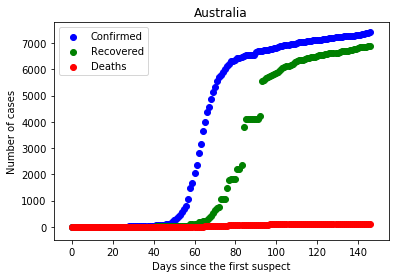

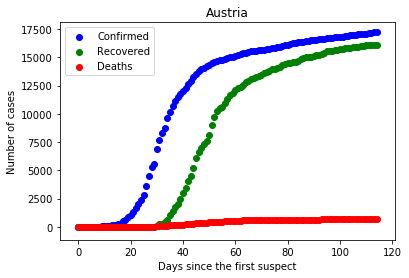

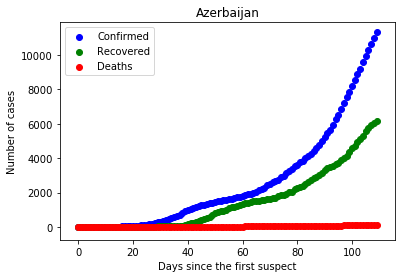

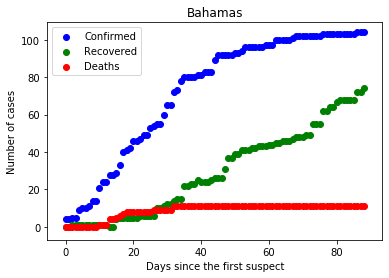

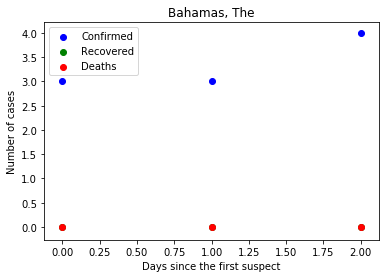

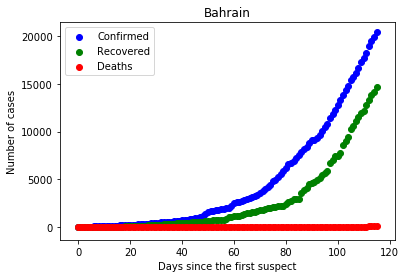

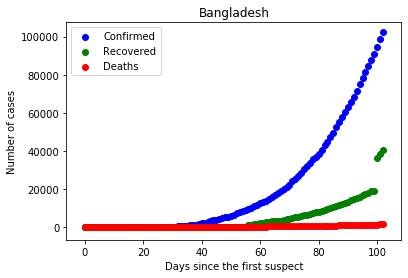

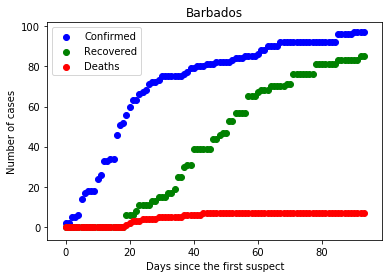

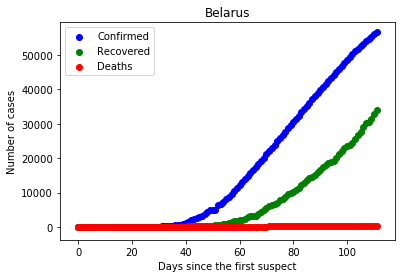

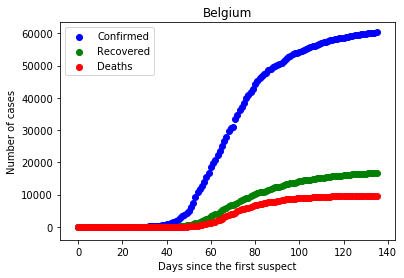

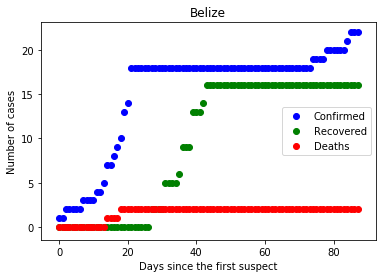

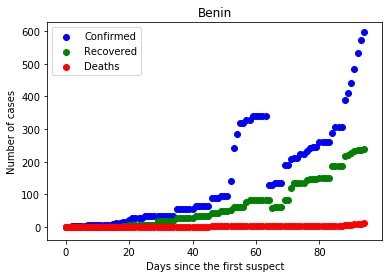

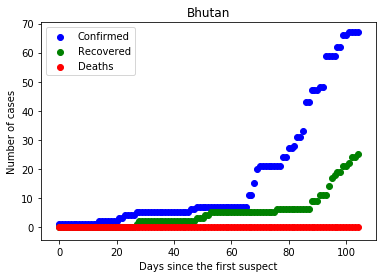

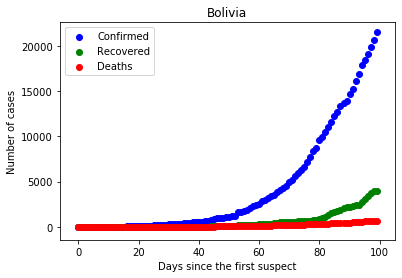

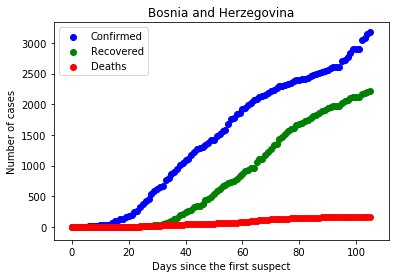

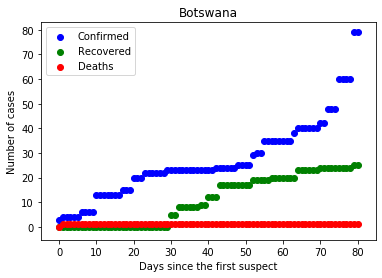

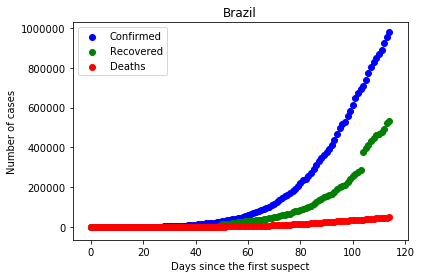

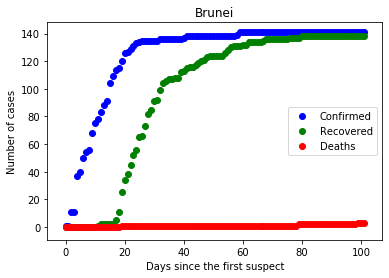

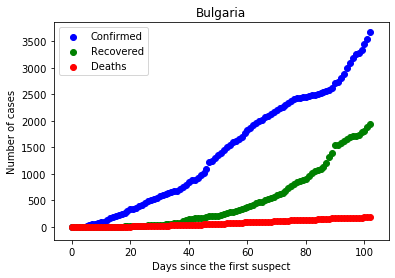

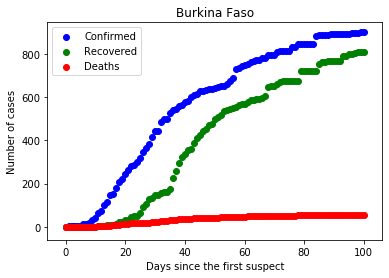

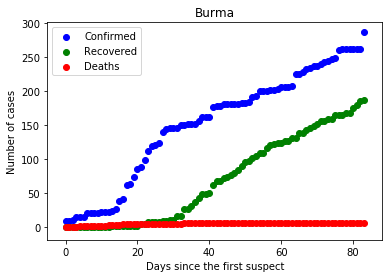

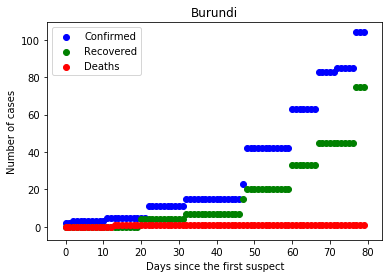

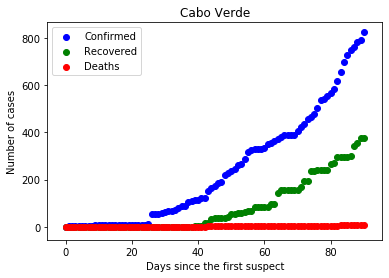

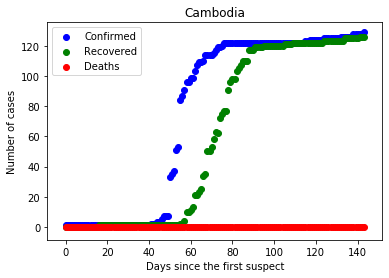

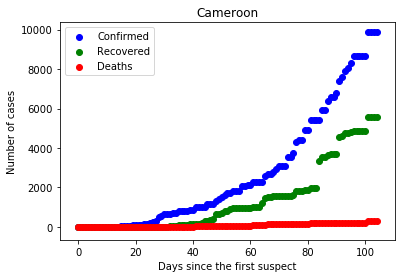

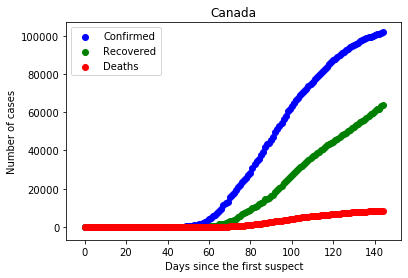

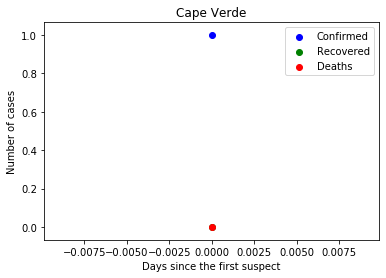

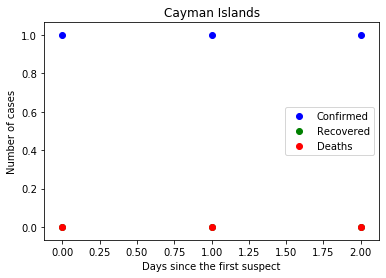

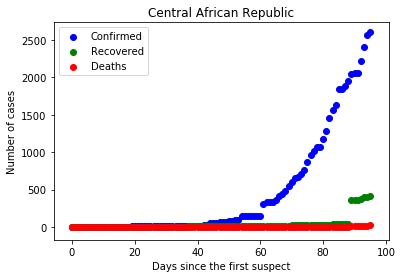

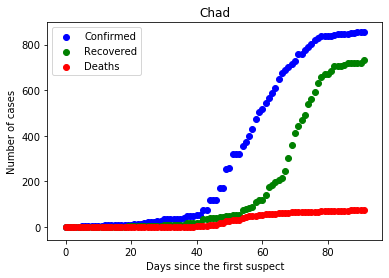

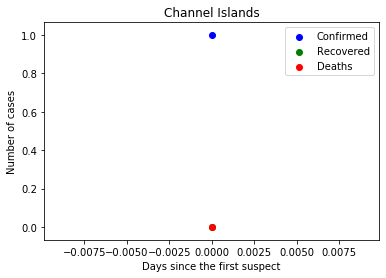

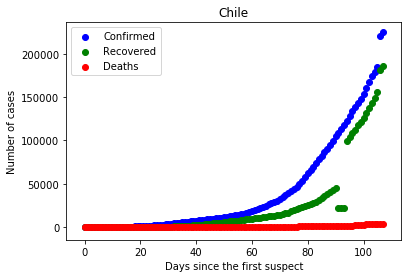

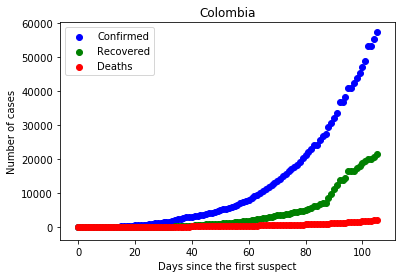

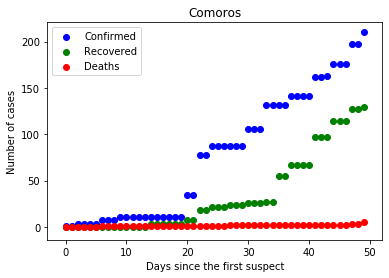

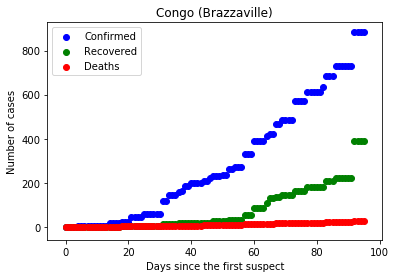

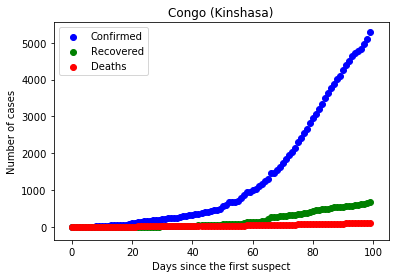

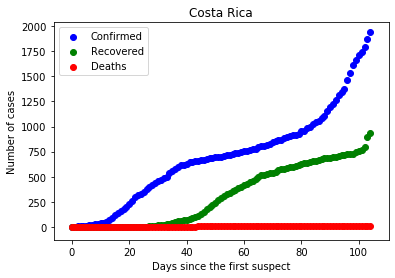

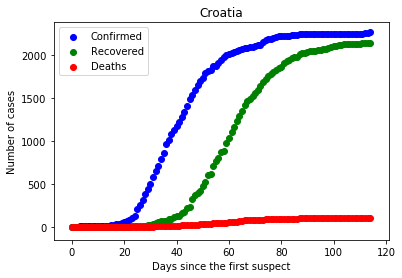

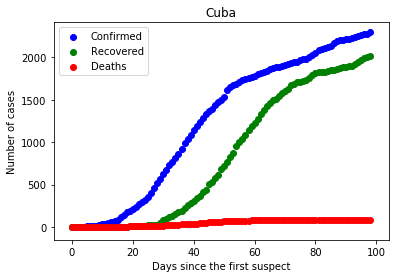

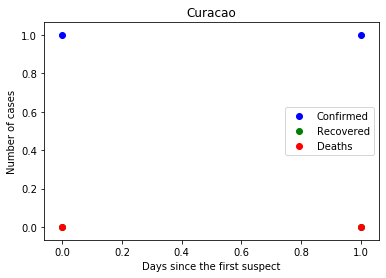

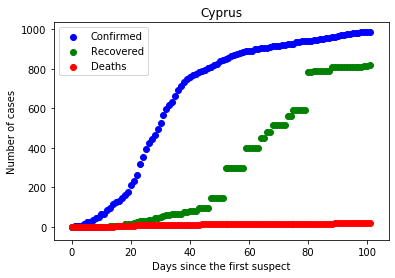

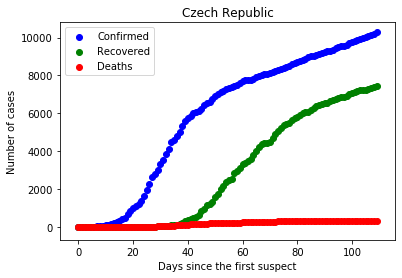

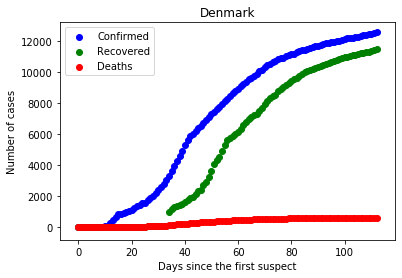

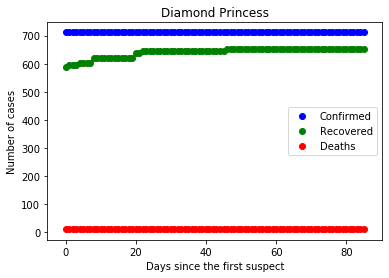

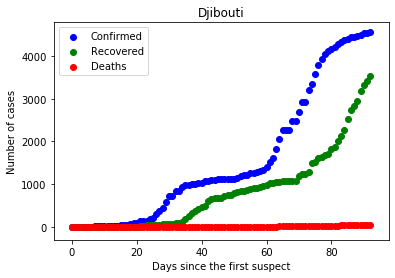

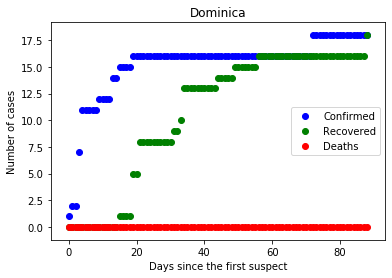

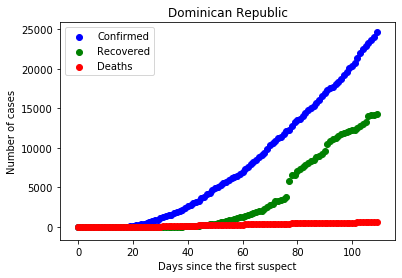

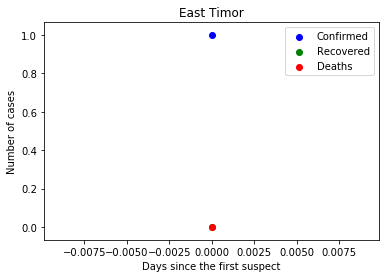

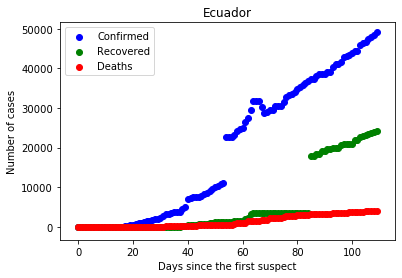

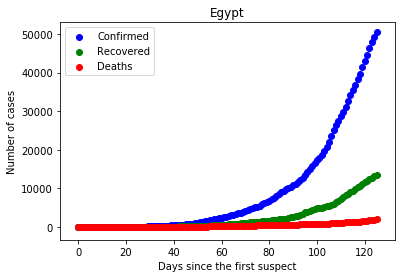

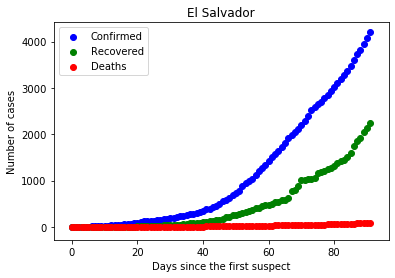

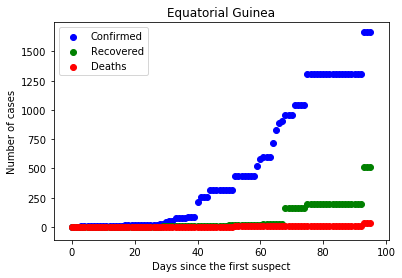

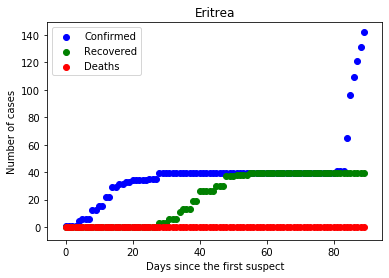

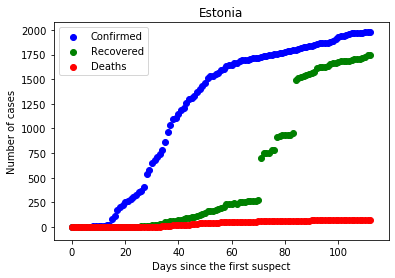

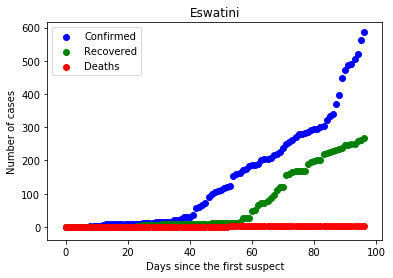

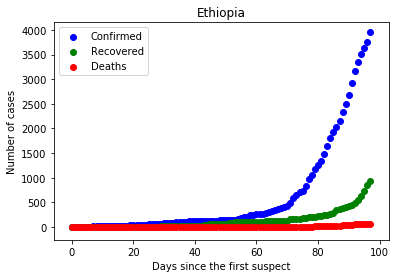

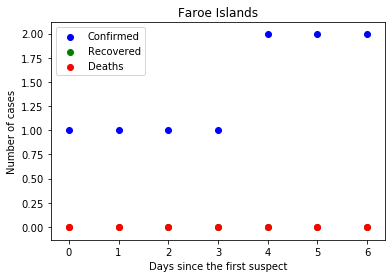

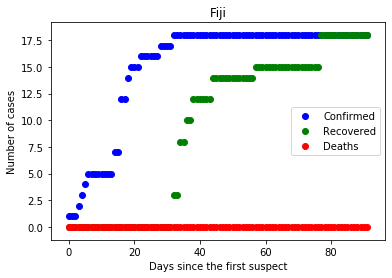

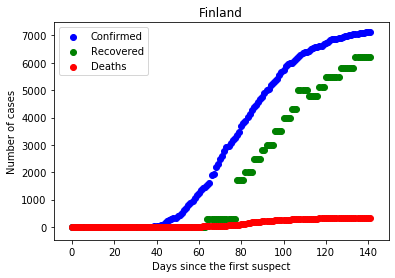

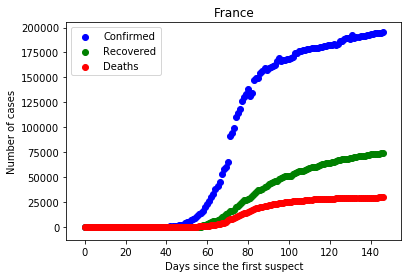

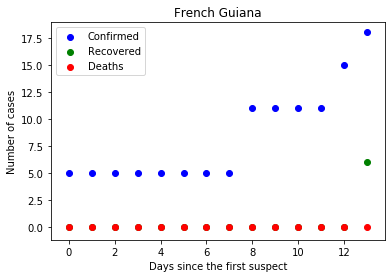

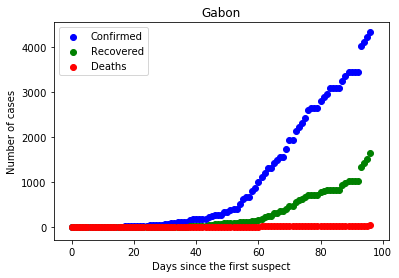

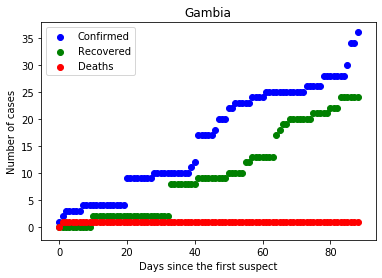

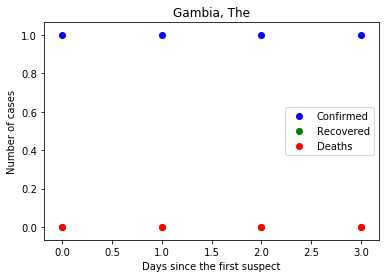

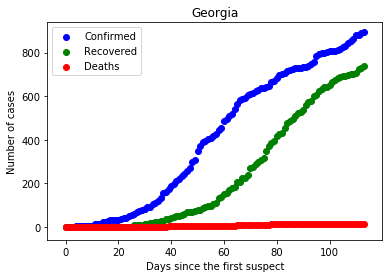

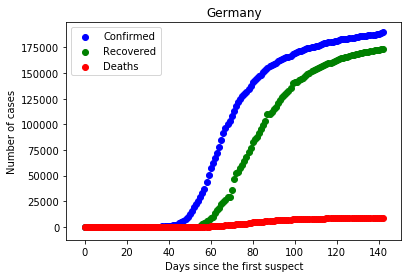

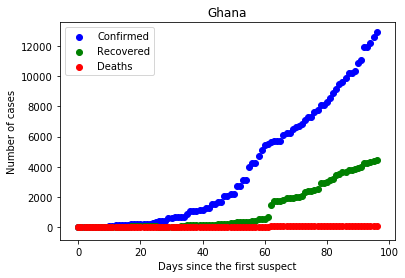

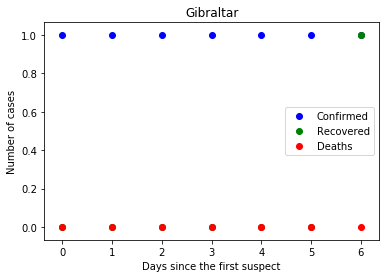

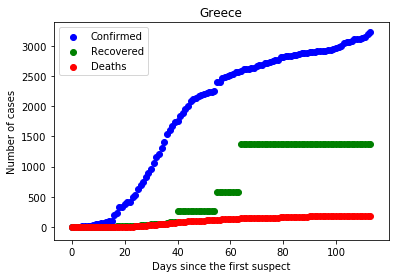

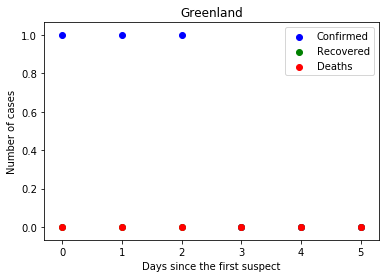

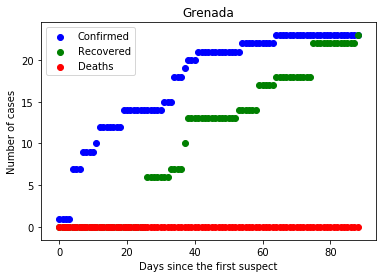

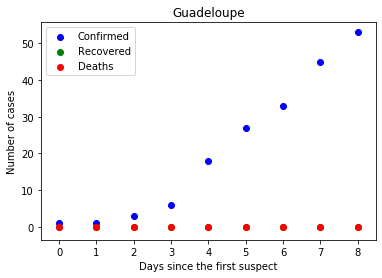

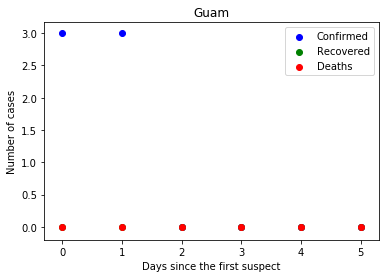

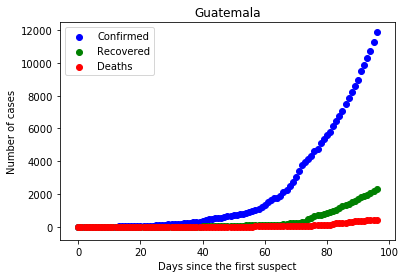

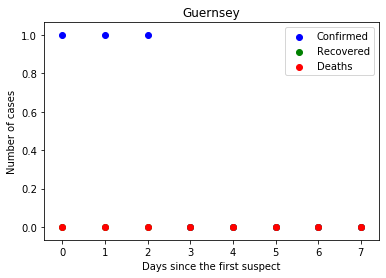

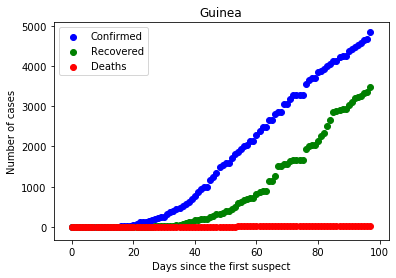

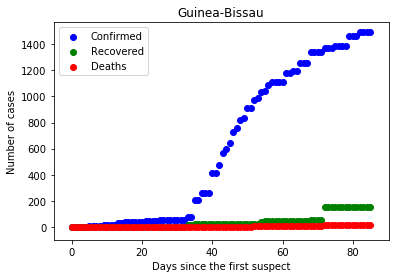

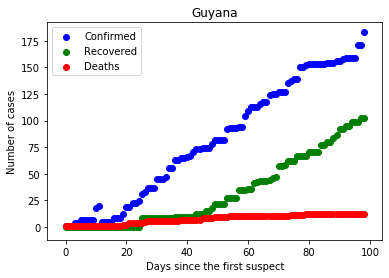

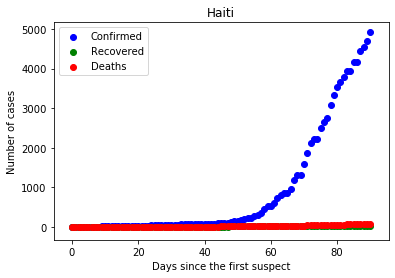

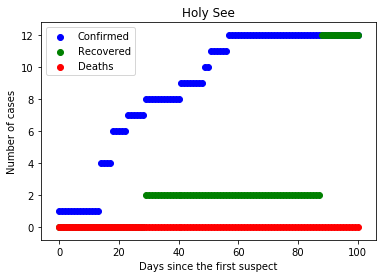

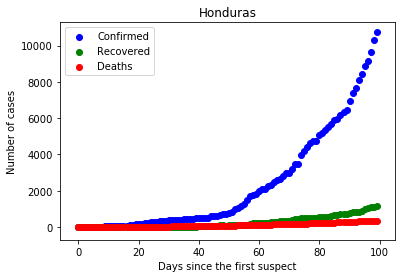

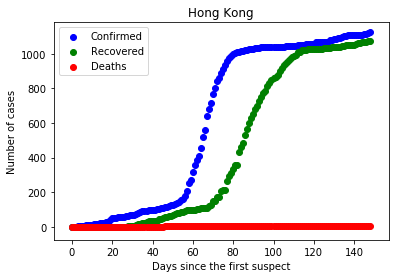

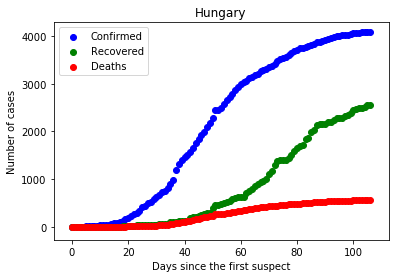

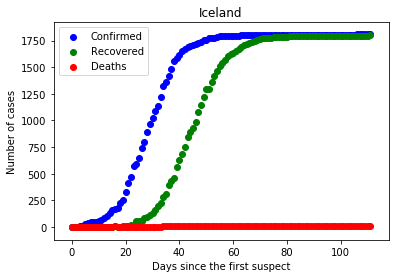

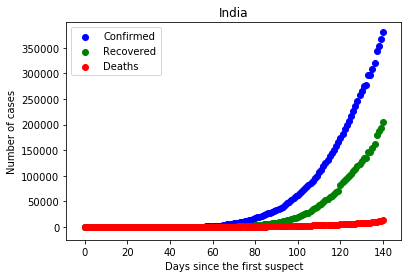

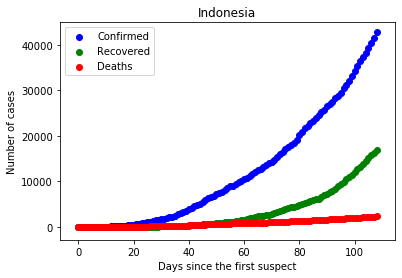

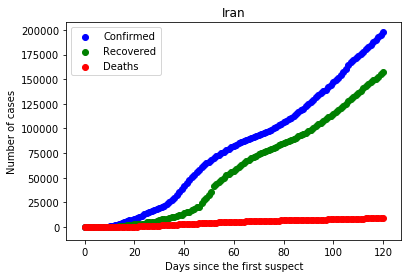

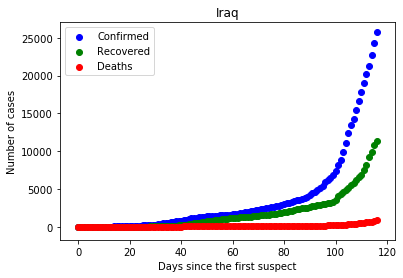

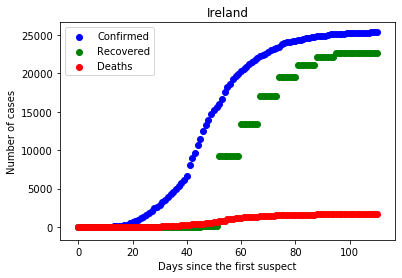

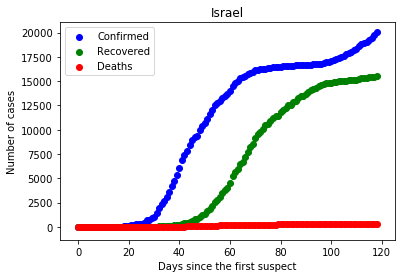

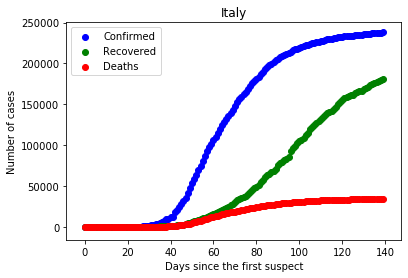

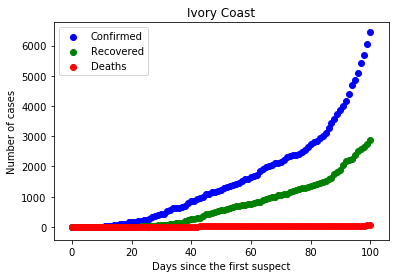

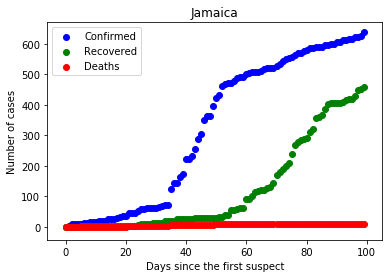

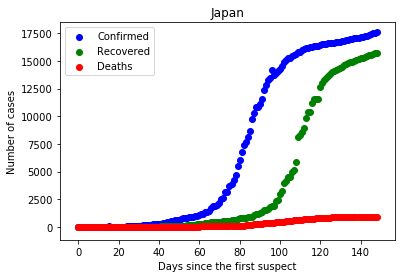

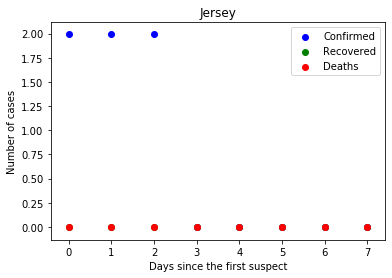

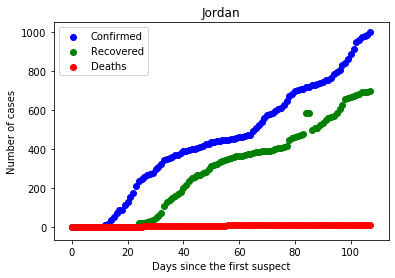

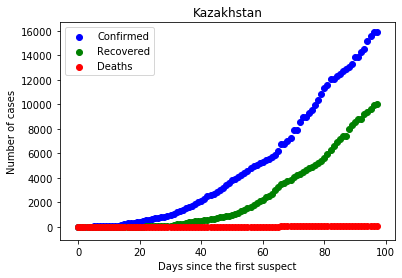

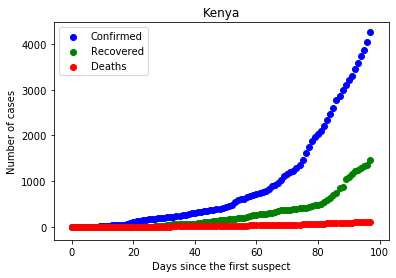

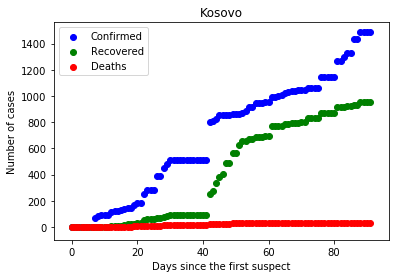

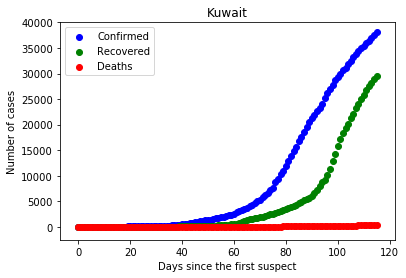

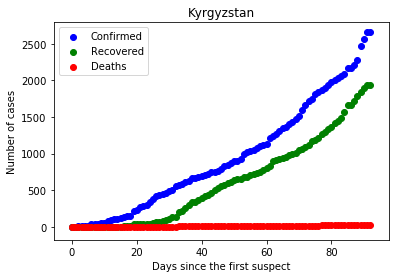

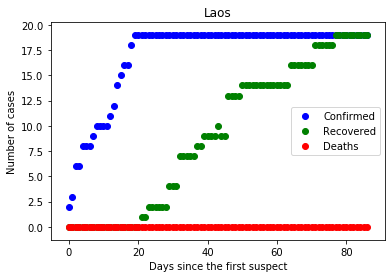

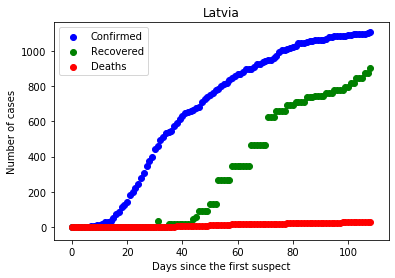

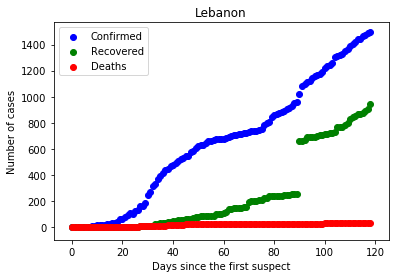

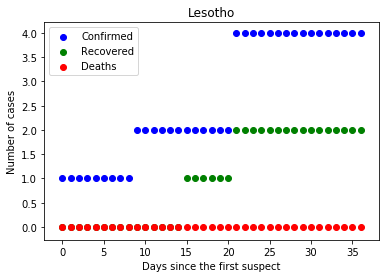

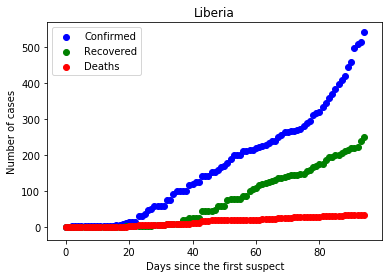

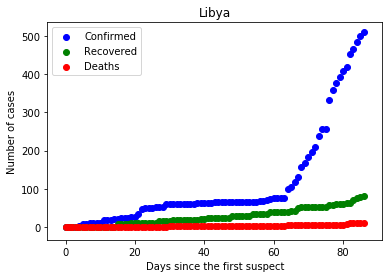

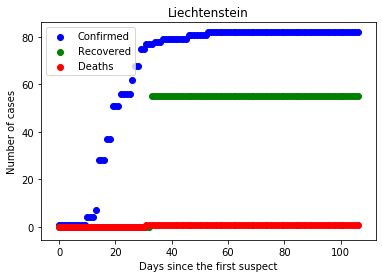

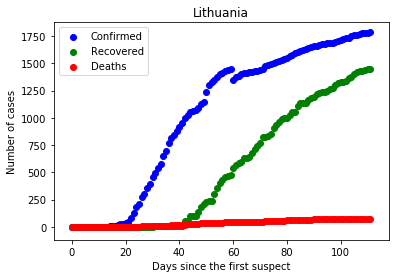

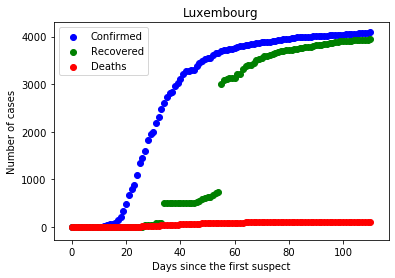

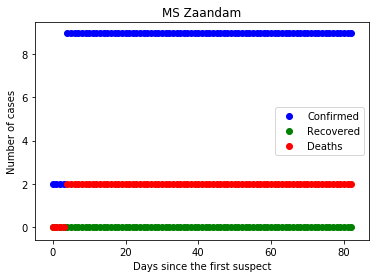

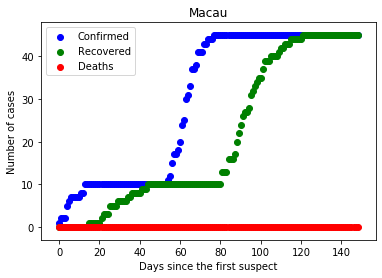

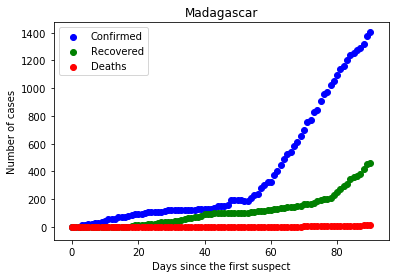

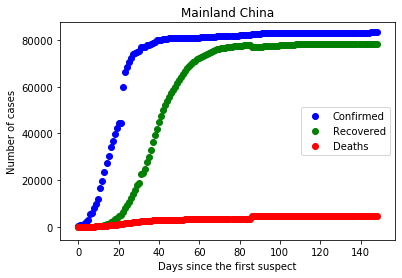

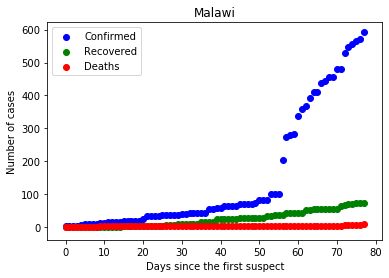

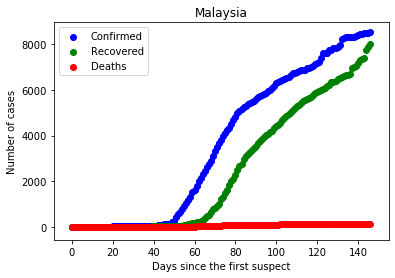

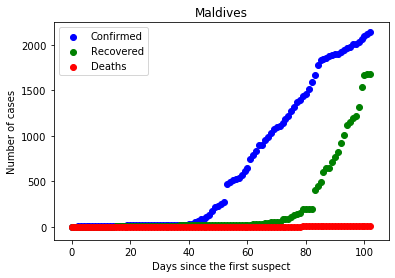

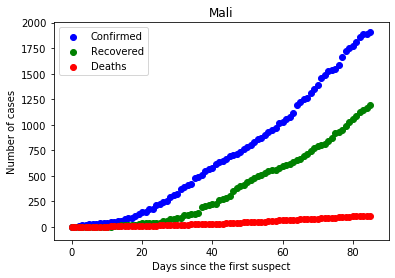

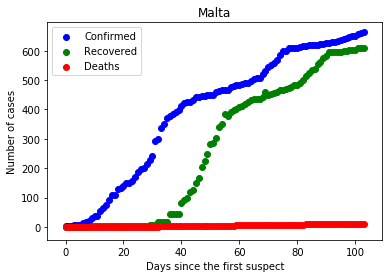

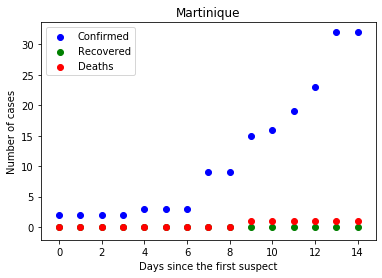

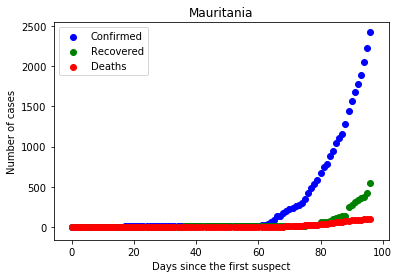

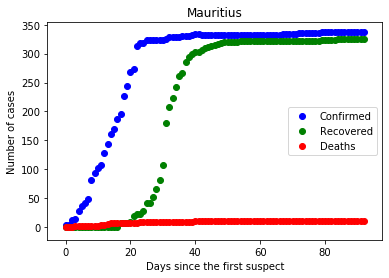

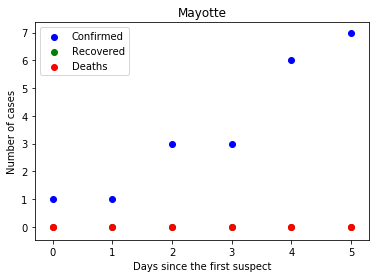

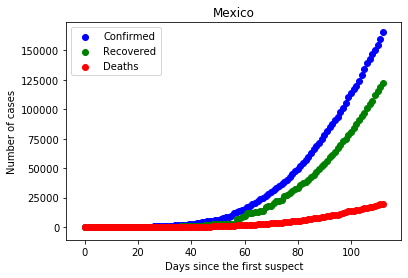

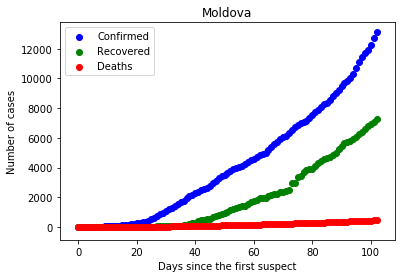

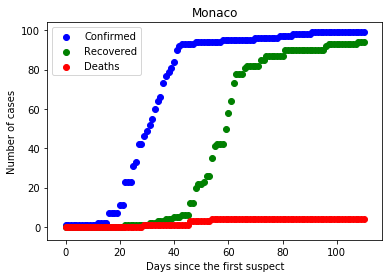

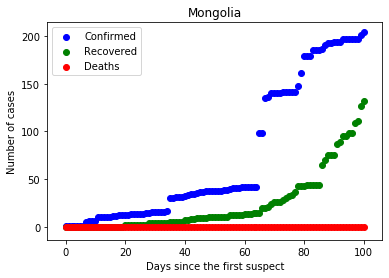

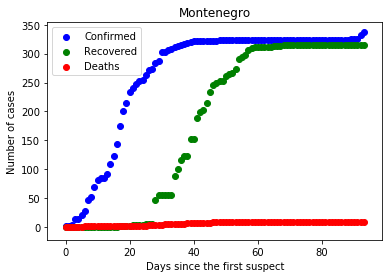

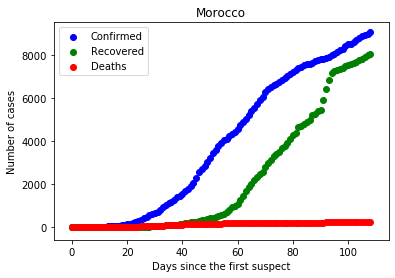

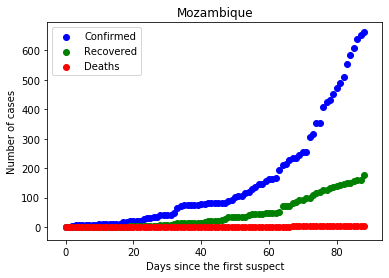

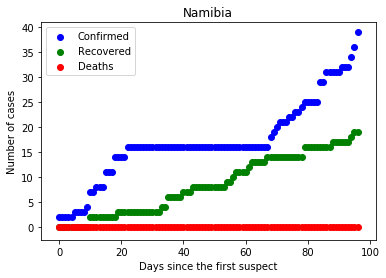

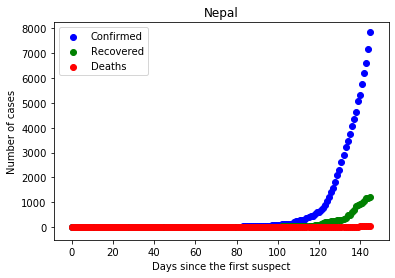

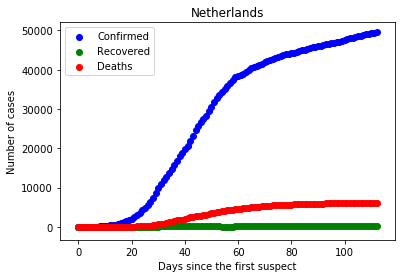

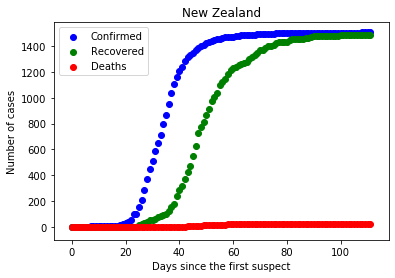

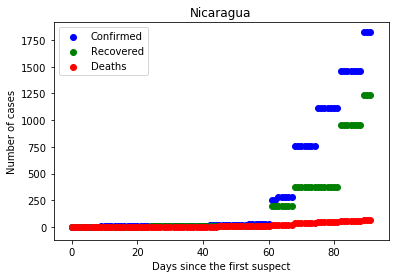

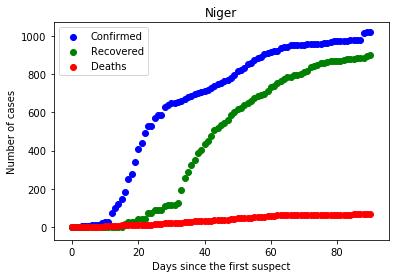

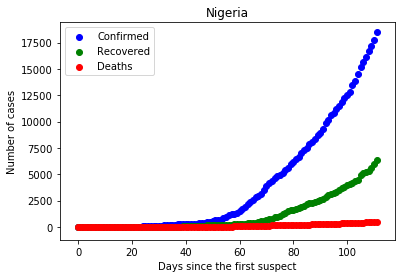

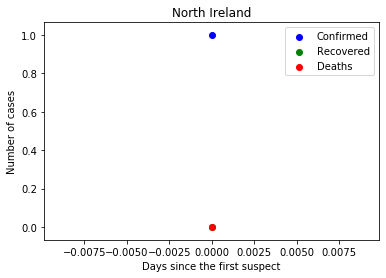

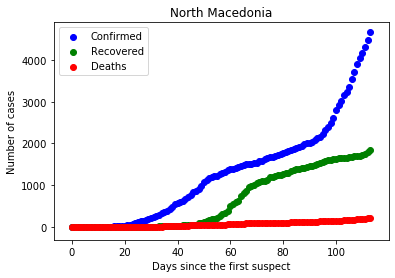

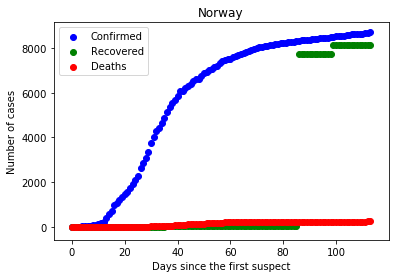

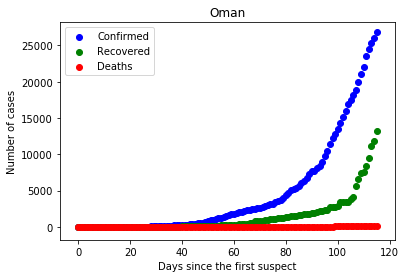

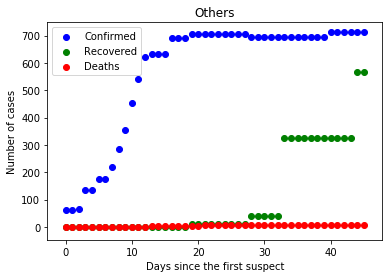

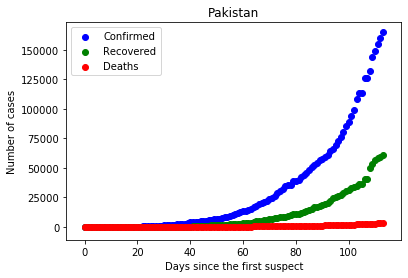

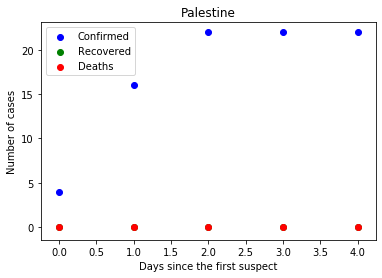

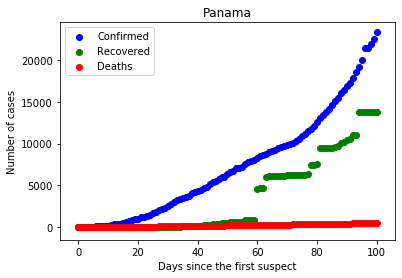

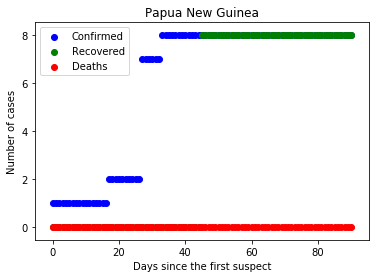

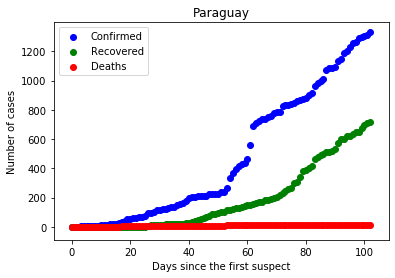

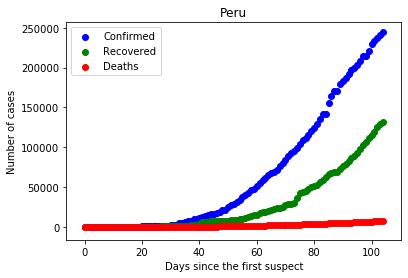

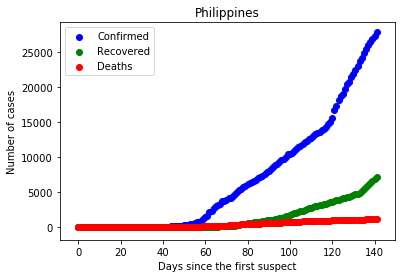

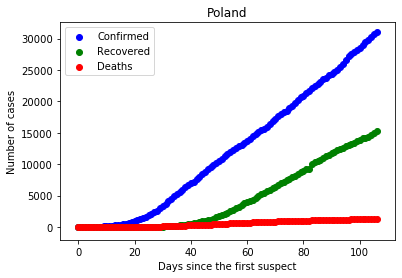

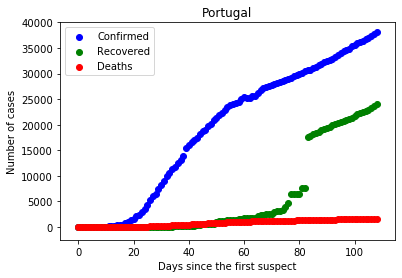

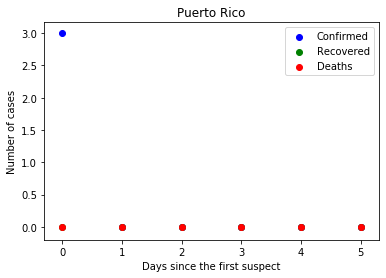

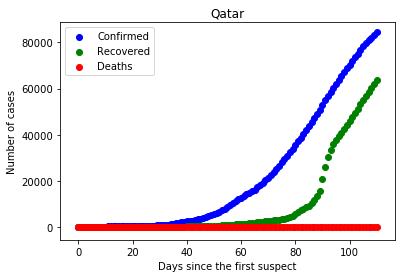

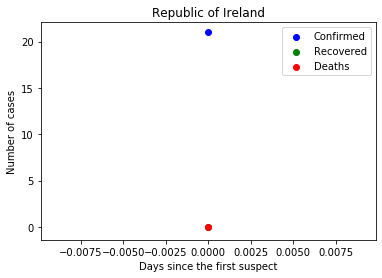

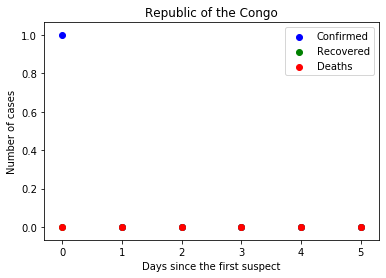

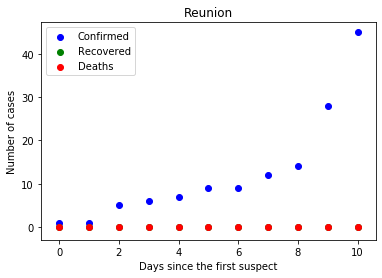

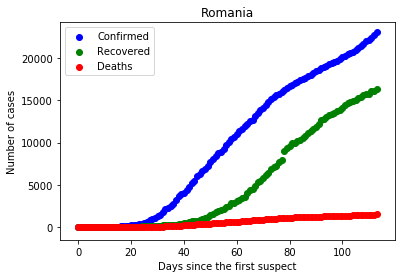

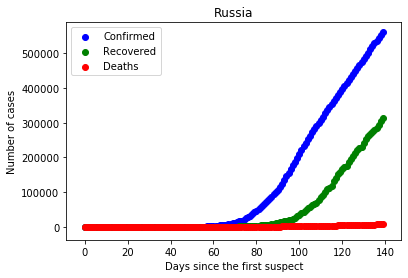

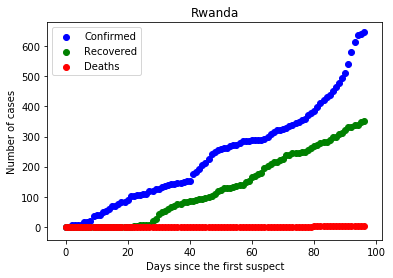

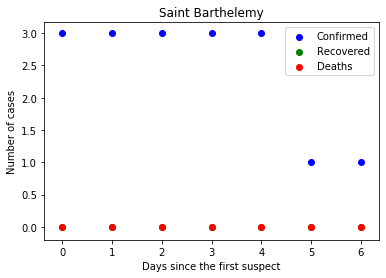

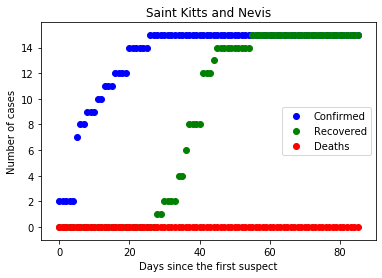

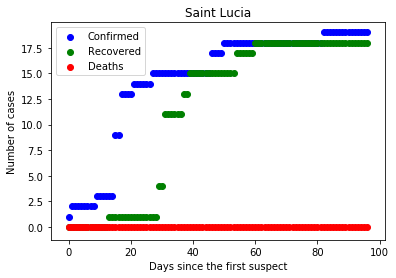

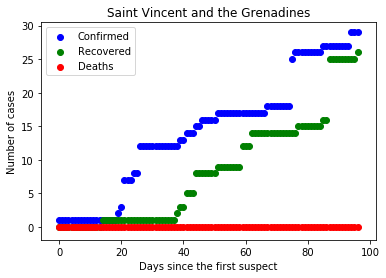

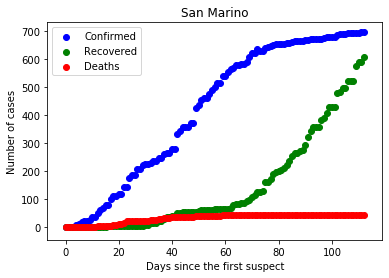

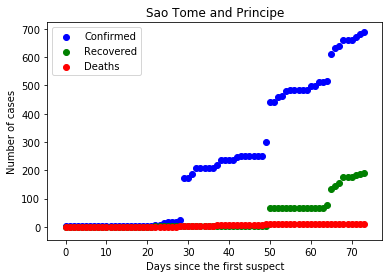

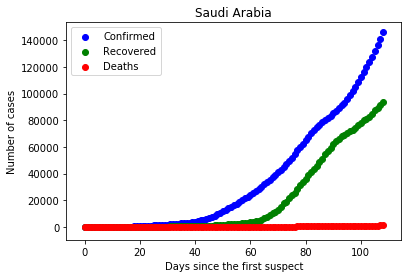

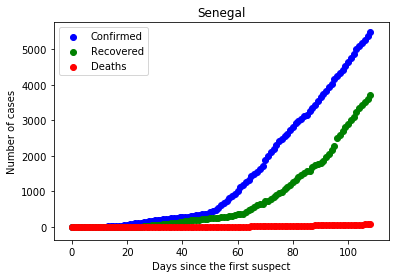

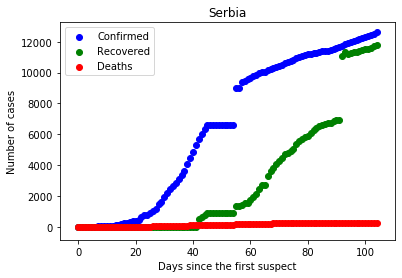

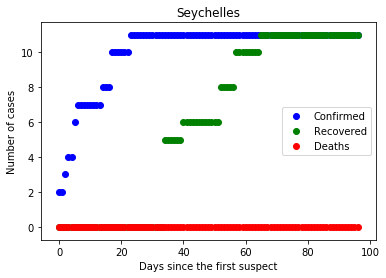

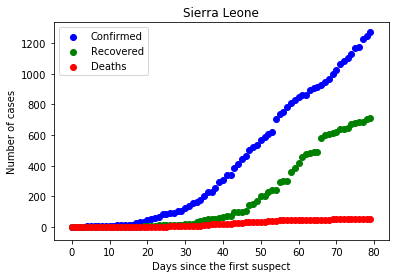

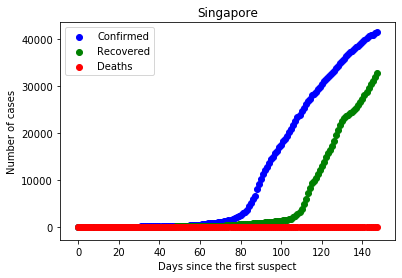

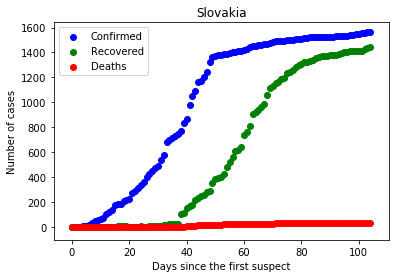

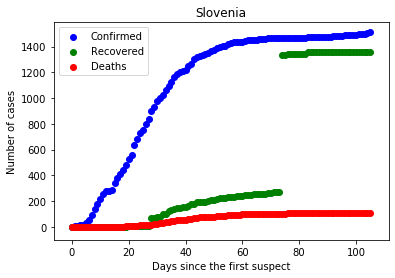

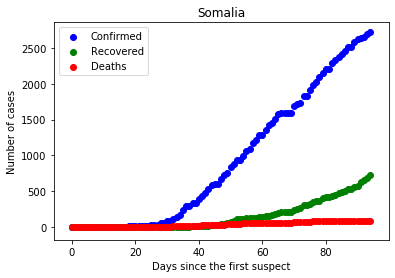

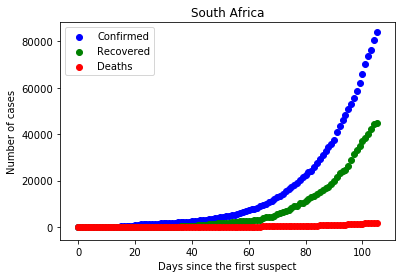

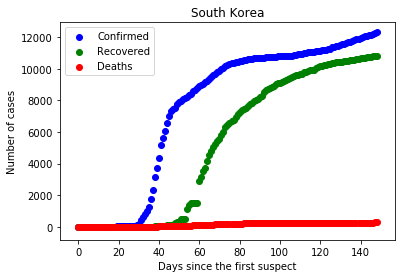

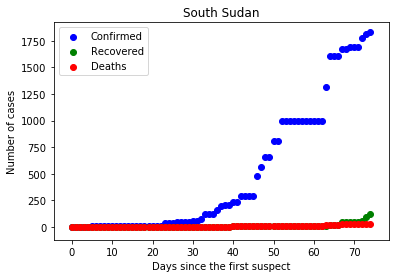

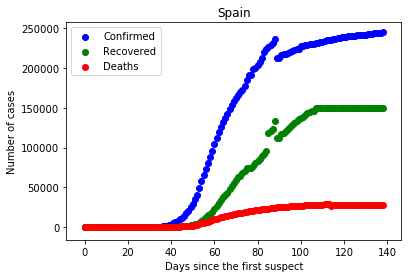

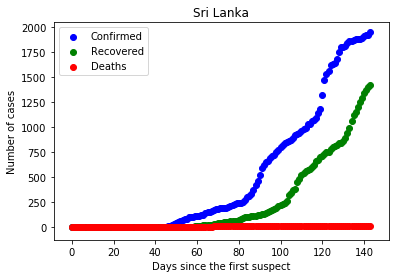

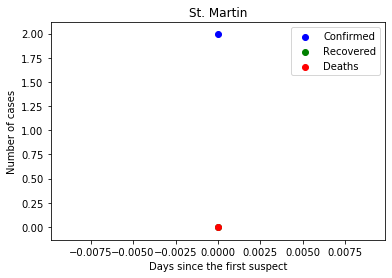

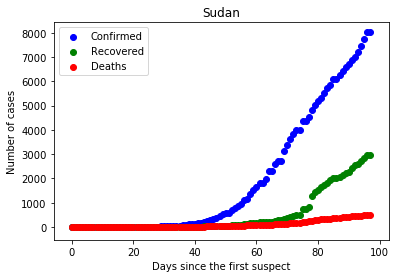

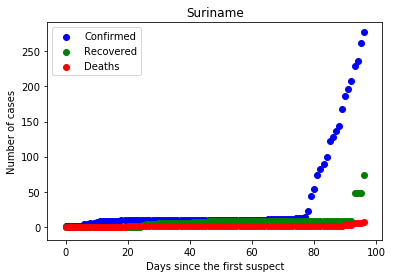

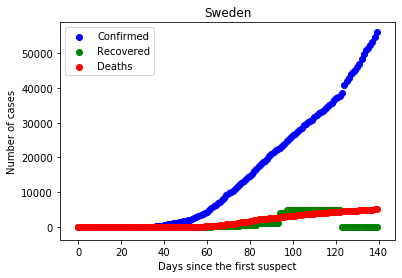

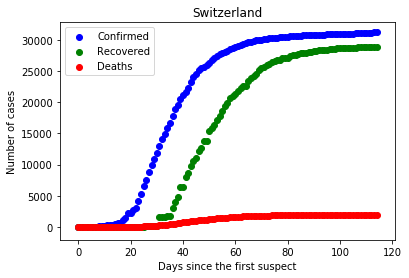

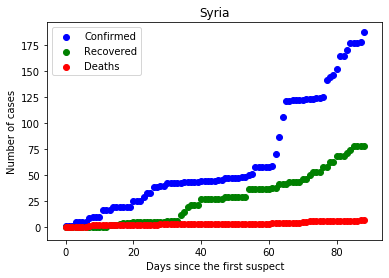

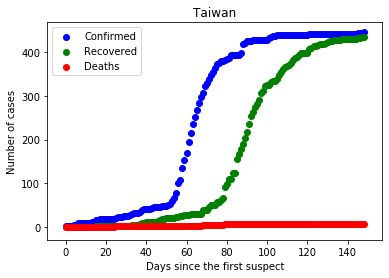

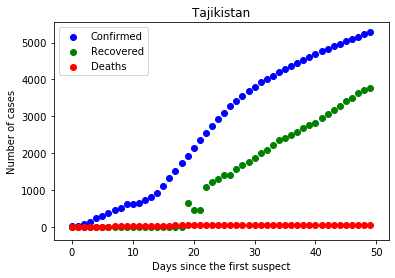

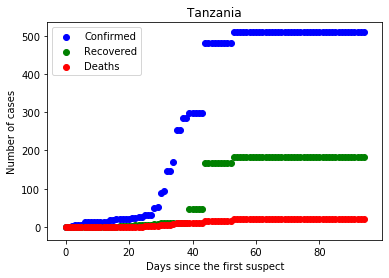

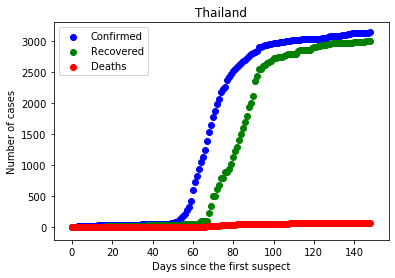

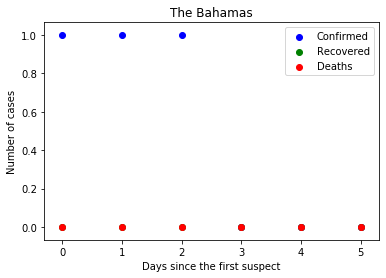

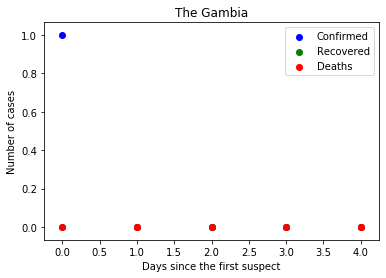

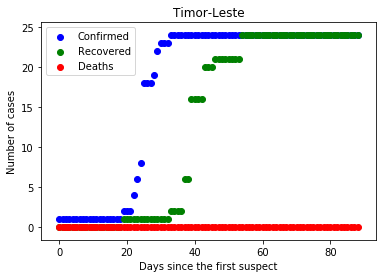

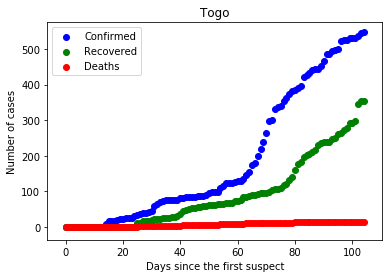

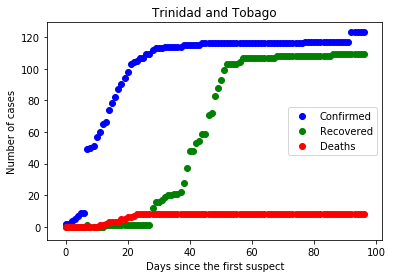

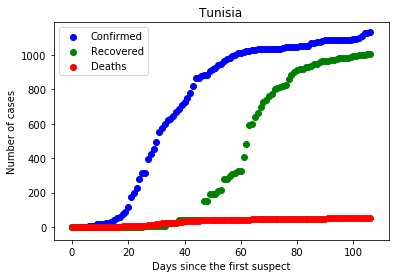

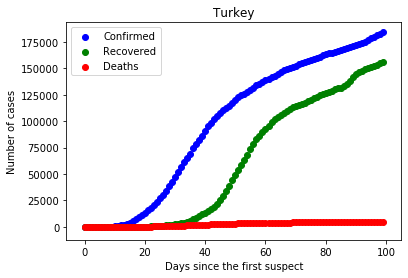

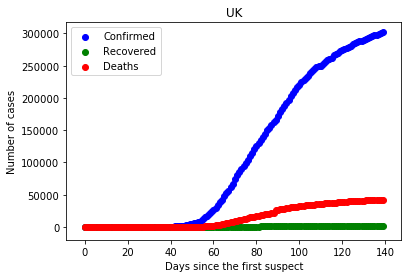

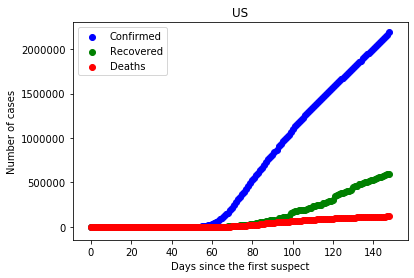

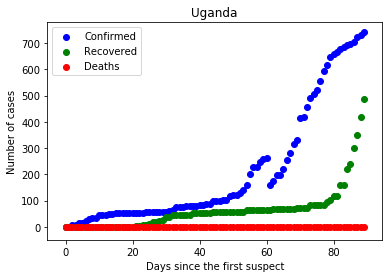

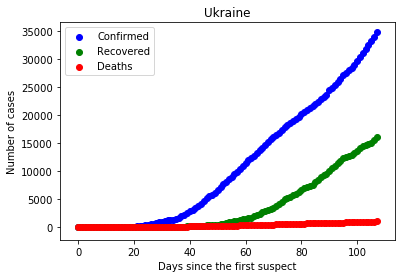

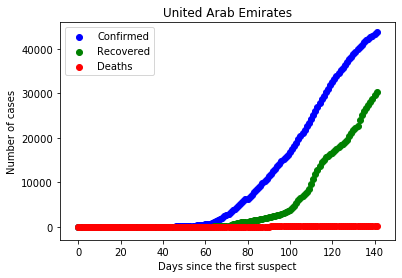

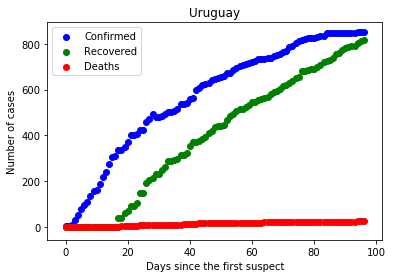

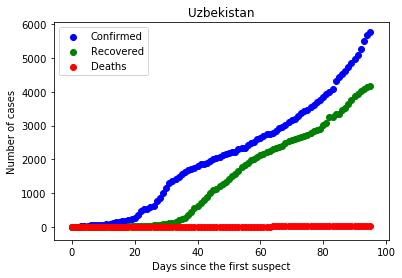

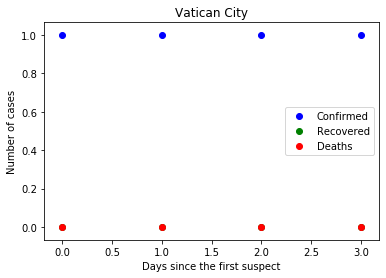

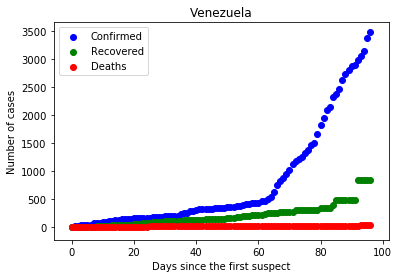

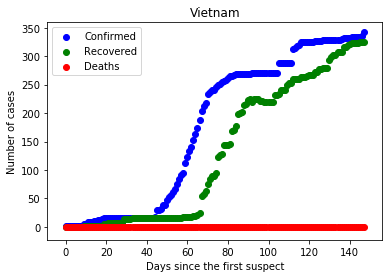

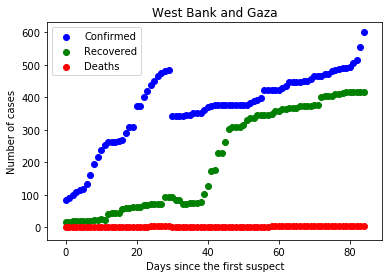

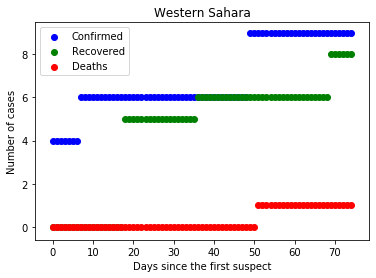

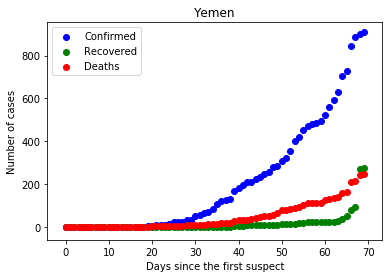

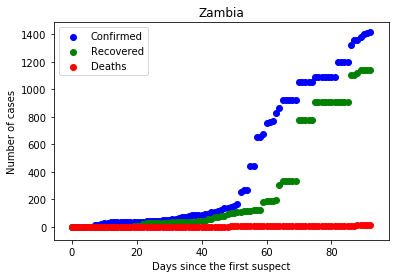

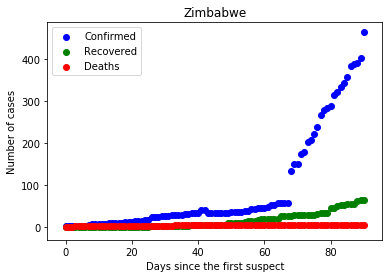

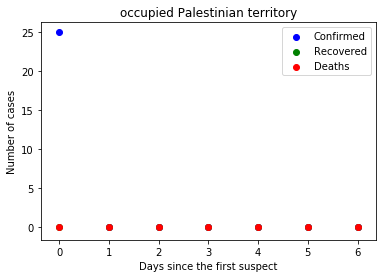

In [21]:
for idx in range(0,len(countries)):    
    C = df3[df3['Country']==countries[idx]].reset_index()        
    plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
    plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
    plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
    plt.title(countries[idx])
    plt.xlabel('Days since the first suspect')
    plt.ylabel('Number of cases')
    plt.legend()
    plt.show()

In [22]:
df4 = df3.groupby(['Date'])[['Date','Confirmed','Deaths','Recovered']].sum().reset_index()

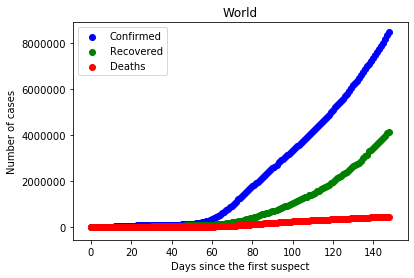

In [23]:

C = df4
plt.scatter(np.arange(0,len(C)),C['Confirmed'],color='blue',label='Confirmed')
plt.scatter(np.arange(0,len(C)),C['Recovered'],color='green',label='Recovered')
plt.scatter(np.arange(0,len(C)),C['Deaths'],color='red',label='Deaths')
plt.title('World')
plt.xlabel('Days since the first suspect')
plt.ylabel('Number of cases')
plt.legend()
plt.show()